In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
pd.set_option('display.max_columns', None)
df=pd.read_excel(r'C:\Users\dell\.spyder-py3\Data\AQI Banglore\AQI Full Data combined.xlsx')
df.head(100)

Date  Average of maxtempC  Average of mintempC  Average of sunHour  \
0  2015-01-01                   28                   18                11.6   
1  2015-01-02                   29                   18                11.6   
2  2015-01-03                   27                   17                11.6   
3  2015-01-04                   28                   17                11.6   
4  2015-01-05                   28                   18                11.6   
..        ...                  ...                  ...                 ...   
95 2015-04-06                   32                   23                10.2   
96 2015-04-07                   34                   23                11.6   
97 2015-04-08                   34                   22                11.6   
98 2015-04-09                   34                   22                11.6   
99 2015-04-10                   34                   22                11.6   

    Average of uvIndex  Average of uvIndex2  Average of moon_illumination  \
0                    6             3.875000                            72   
1                    6             4.000000                            80   
2                    5             3.875000                            87   
3                    5             3.875000                            94   
4                    5             3.958333                           100   
..                 ...                  ...                           ...   
95                   7             4.500000                            77   
96                   7             4.666667                            69   
97                   7             4.625000                            61   
98                   7             4.625000                            54   
99                   7             4.583333                            46   

    Average of DewPointC  Average of FeelsLikeC  Average of HeatIndexC  \
0              17.166667              23.125000              23.333333   
1              16.791667              23.000000              23.500000   
2              16.666667              22.166667              22.166667   
3              16.416667              23.041667              23.125000   
4              15.458333              22.583333              22.833333   
..                   ...                    ...                    ...   
95             16.375000              29.041667              29.041667   
96             16.583333              29.625000              29.625000   
97             15.458333              28.666667              28.750000   
98             16.416667              29.000000              29.083333   
99             14.166667              28.291667              28.416667   

    Average of WindChillC  Average of WindGustKmph  Average of cloudcover  \
0               22.625000                13.708333              48.791667   
1               22.583333                14.250000              34.416667   
2               21.750000                13.541667              29.166667   
3               22.583333                13.041667              45.750000   
4               22.416667                15.750000              40.666667   
..                    ...                      ...                    ...   
95              28.291667                12.000000              29.750000   
96              28.750000                12.041667              28.291667   
97              28.166667                15.875000              13.833333   
98              28.291667                14.375000              12.083333   
99              28.125000                14.125000              13.250000   

    Average of humidity  Average of precipMM  Average of pressure  \
0             74.000000             0.008333          1010.458333   
1             72.458333             0.004167          1012.583333   
2             74.916667             0.000000          1013.833333   
3             71.000000             0.000000 

In [27]:
df.shape

(1826, 21)

In [28]:
#checking null values
df.isnull().sum()

Date                              0
Average of maxtempC               0
Average of mintempC               0
Average of sunHour                0
Average of uvIndex                0
Average of uvIndex2               0
Average of moon_illumination      0
Average of DewPointC              0
Average of FeelsLikeC             0
Average of HeatIndexC             0
Average of WindChillC             0
Average of WindGustKmph           0
Average of cloudcover             0
Average of humidity               0
Average of precipMM               0
Average of pressure               0
Average of tempC                  0
Average of visibility             0
Average of winddirDegree          0
Average of windspeedKmph          0
PM2.5                           146
dtype: int64

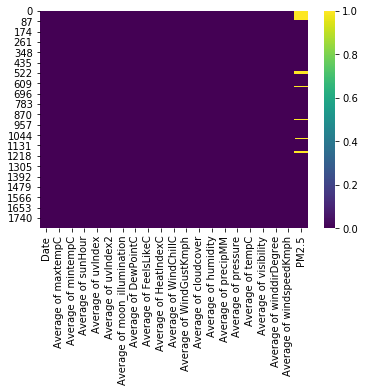

In [29]:
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')

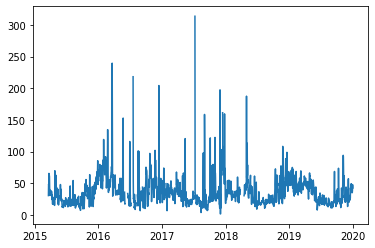

In [30]:
#Let's try to find relationship between null values in target value and Date
plt.plot('Date','PM2.5', data=df)

In [31]:
#Dropping null values
data=df.copy()
data=data.dropna()

In [32]:
data.dtypes

Date                            datetime64[ns]
Average of maxtempC                      int64
Average of mintempC                      int64
Average of sunHour                     float64
Average of uvIndex                       int64
Average of uvIndex2                    float64
Average of moon_illumination             int64
Average of DewPointC                   float64
Average of FeelsLikeC                  float64
Average of HeatIndexC                  float64
Average of WindChillC                  float64
Average of WindGustKmph                float64
Average of cloudcover                  float64
Average of humidity                    float64
Average of precipMM                    float64
Average of pressure                    float64
Average of tempC                       float64
Average of visibility                  float64
Average of winddirDegree               float64
Average of windspeedKmph               float64
PM2.5                                  float64
dtype: object

In [33]:
#data=data.reset_index()
X=data.iloc[:,3:-1]
y=data.iloc[:,-1]

In [34]:
X

Average of sunHour  Average of uvIndex  Average of uvIndex2  \
78                  11.6                   7             4.458333   
79                  11.6                   7             4.458333   
80                  11.6                   7             4.625000   
81                  11.6                   7             4.625000   
82                  11.6                   7             4.666667   
...                  ...                 ...                  ...   
1821                11.6                   6             3.875000   
1822                11.6                   6             3.791667   
1823                10.2                   6             3.541667   
1824                10.2                   5             3.458333   
1825                11.6                   5             3.625000   

      Average of moon_illumination  Average of DewPointC  \
78                               0              7.291667   
79                               3              5.958333   
80                              10              6.750000   
81                              17              9.708333   
82                              24             11.625000   
...                            ...                   ...   
1821                             0             16.958333   
1822                             8             16.000000   
1823                            15             15.958333   
1824                            22             15.875000   
1825                            26             16.750000   

      Average of FeelsLikeC  Average of HeatIndexC  Average of WindChillC  \
78                25.541667              26.041667              26.416667   
79                25.666667              26.000000              26.541667   
80                27.083333              27.500000              27.875000   
81                27.541667              27.875000              28.208333   
82                28.041667              28.208333              28.375000   
...                     ...                    ...                    ...   
1821              22.916667              23.083333              22.416667   
1822              21.791667              21.833333              21.375000   
1823              21.250000              21.291667              20.916667   
1824              21.375000              21.791667              20.791667   
1825              21.875000              22.250000              21.208333   

      Average of WindGustKmph  Average of cloudcover  Average of humidity  \
78                  22.750000               1.041667            35.833333   
79                  22.791667               0.000000            33.458333   
80                  19.625000               1.375000            29.875000   
81                  16.375000               7.875000            33.583333   
82                  18.291667               5.291667            40.166667   
...                       ...                    ...                  ...   
1821                13.916667              29.375000            72.708333   
1822                18.833333              28.666667            72.916667   
1823                18.500000              45.250000            75.166667   
1824                18.333333              50.708333            75.125000   
1825                17.833333              39.583333            77.000000   

      Average of precipMM  Average of pressure  Average of tempC  \
78               0.000000          1013.666667         25.958333   
79               0.000000          1014.583333         26.000000   
80               0.000000          1013.416667         27.000000   
81               0.000000          1011.708333         27.666667   
82               0.000000          1010.458333         27.875000   
...                   ...                  ...               ...   
1821             0.000000          1012.291667         22.416667   
1822             0.000000          1012.916667         21.3750

In [35]:
y

78      30.65
79      48.59
80      47.38
81      65.65
82      60.47
        ...  
1821    43.32
1822    35.24
1823    38.53
1824    47.81
1825    42.54
Name: PM2.5, Length: 1680, dtype: float64

In [36]:
data.head()

Date  Average of maxtempC  Average of mintempC  Average of sunHour  \
78 2015-03-20                   33                   18                11.6   
79 2015-03-21                   34                   18                11.6   
80 2015-03-22                   35                   19                11.6   
81 2015-03-23                   35                   20                11.6   
82 2015-03-24                   35                   21                11.6   

    Average of uvIndex  Average of uvIndex2  Average of moon_illumination  \
78                   7             4.458333                             0   
79                   7             4.458333                             3   
80                   7             4.625000                            10   
81                   7             4.625000                            17   
82                   7             4.666667                            24   

    Average of DewPointC  Average of FeelsLikeC  Average of HeatIndexC  \
78              7.291667              25.541667              26.041667   
79              5.958333              25.666667              26.000000   
80              6.750000              27.083333              27.500000   
81              9.708333              27.541667              27.875000   
82             11.625000              28.041667              28.208333   

    Average of WindChillC  Average of WindGustKmph  Average of cloudcover  \
78              26.416667                22.750000               1.041667   
79              26.541667                22.791667               0.000000   
80              27.875000                19.625000               1.375000   
81              28.208333                16.375000               7.875000   
82              28.375000                18.291667               5.291667   

    Average of humidity  Average of precipMM  Average of pressure  \
78            35.833333                  0.0          1013.666667   
79            33.458333                  0.0          1014.583333   
80            29.875000                  0.0          1013.416667   
81            33.583333                  0.0          1011.708333   
82            40.166667                  0.0          1010.458333   

    Average of tempC  Average of visibility  Average of winddirDegree  \
78         25.958333                   10.0                107.916667   
79         26.000000                   10.0                106.791667   
80         27.000000                   10.0                112.541667   
81         27.666667                   10.0                106.541667   
82         27.875000                   10.0                119.333333   

    Average of windspeedKmph  PM2.5  
78                 15.416667  30.65  
79                 15.041667  48.59  
80                 13.125000  47.38  
81                 10.750000  65.65  
82                 12.750000  60.47

In [37]:
data.drop(['Date'],axis=1, inplace=True)

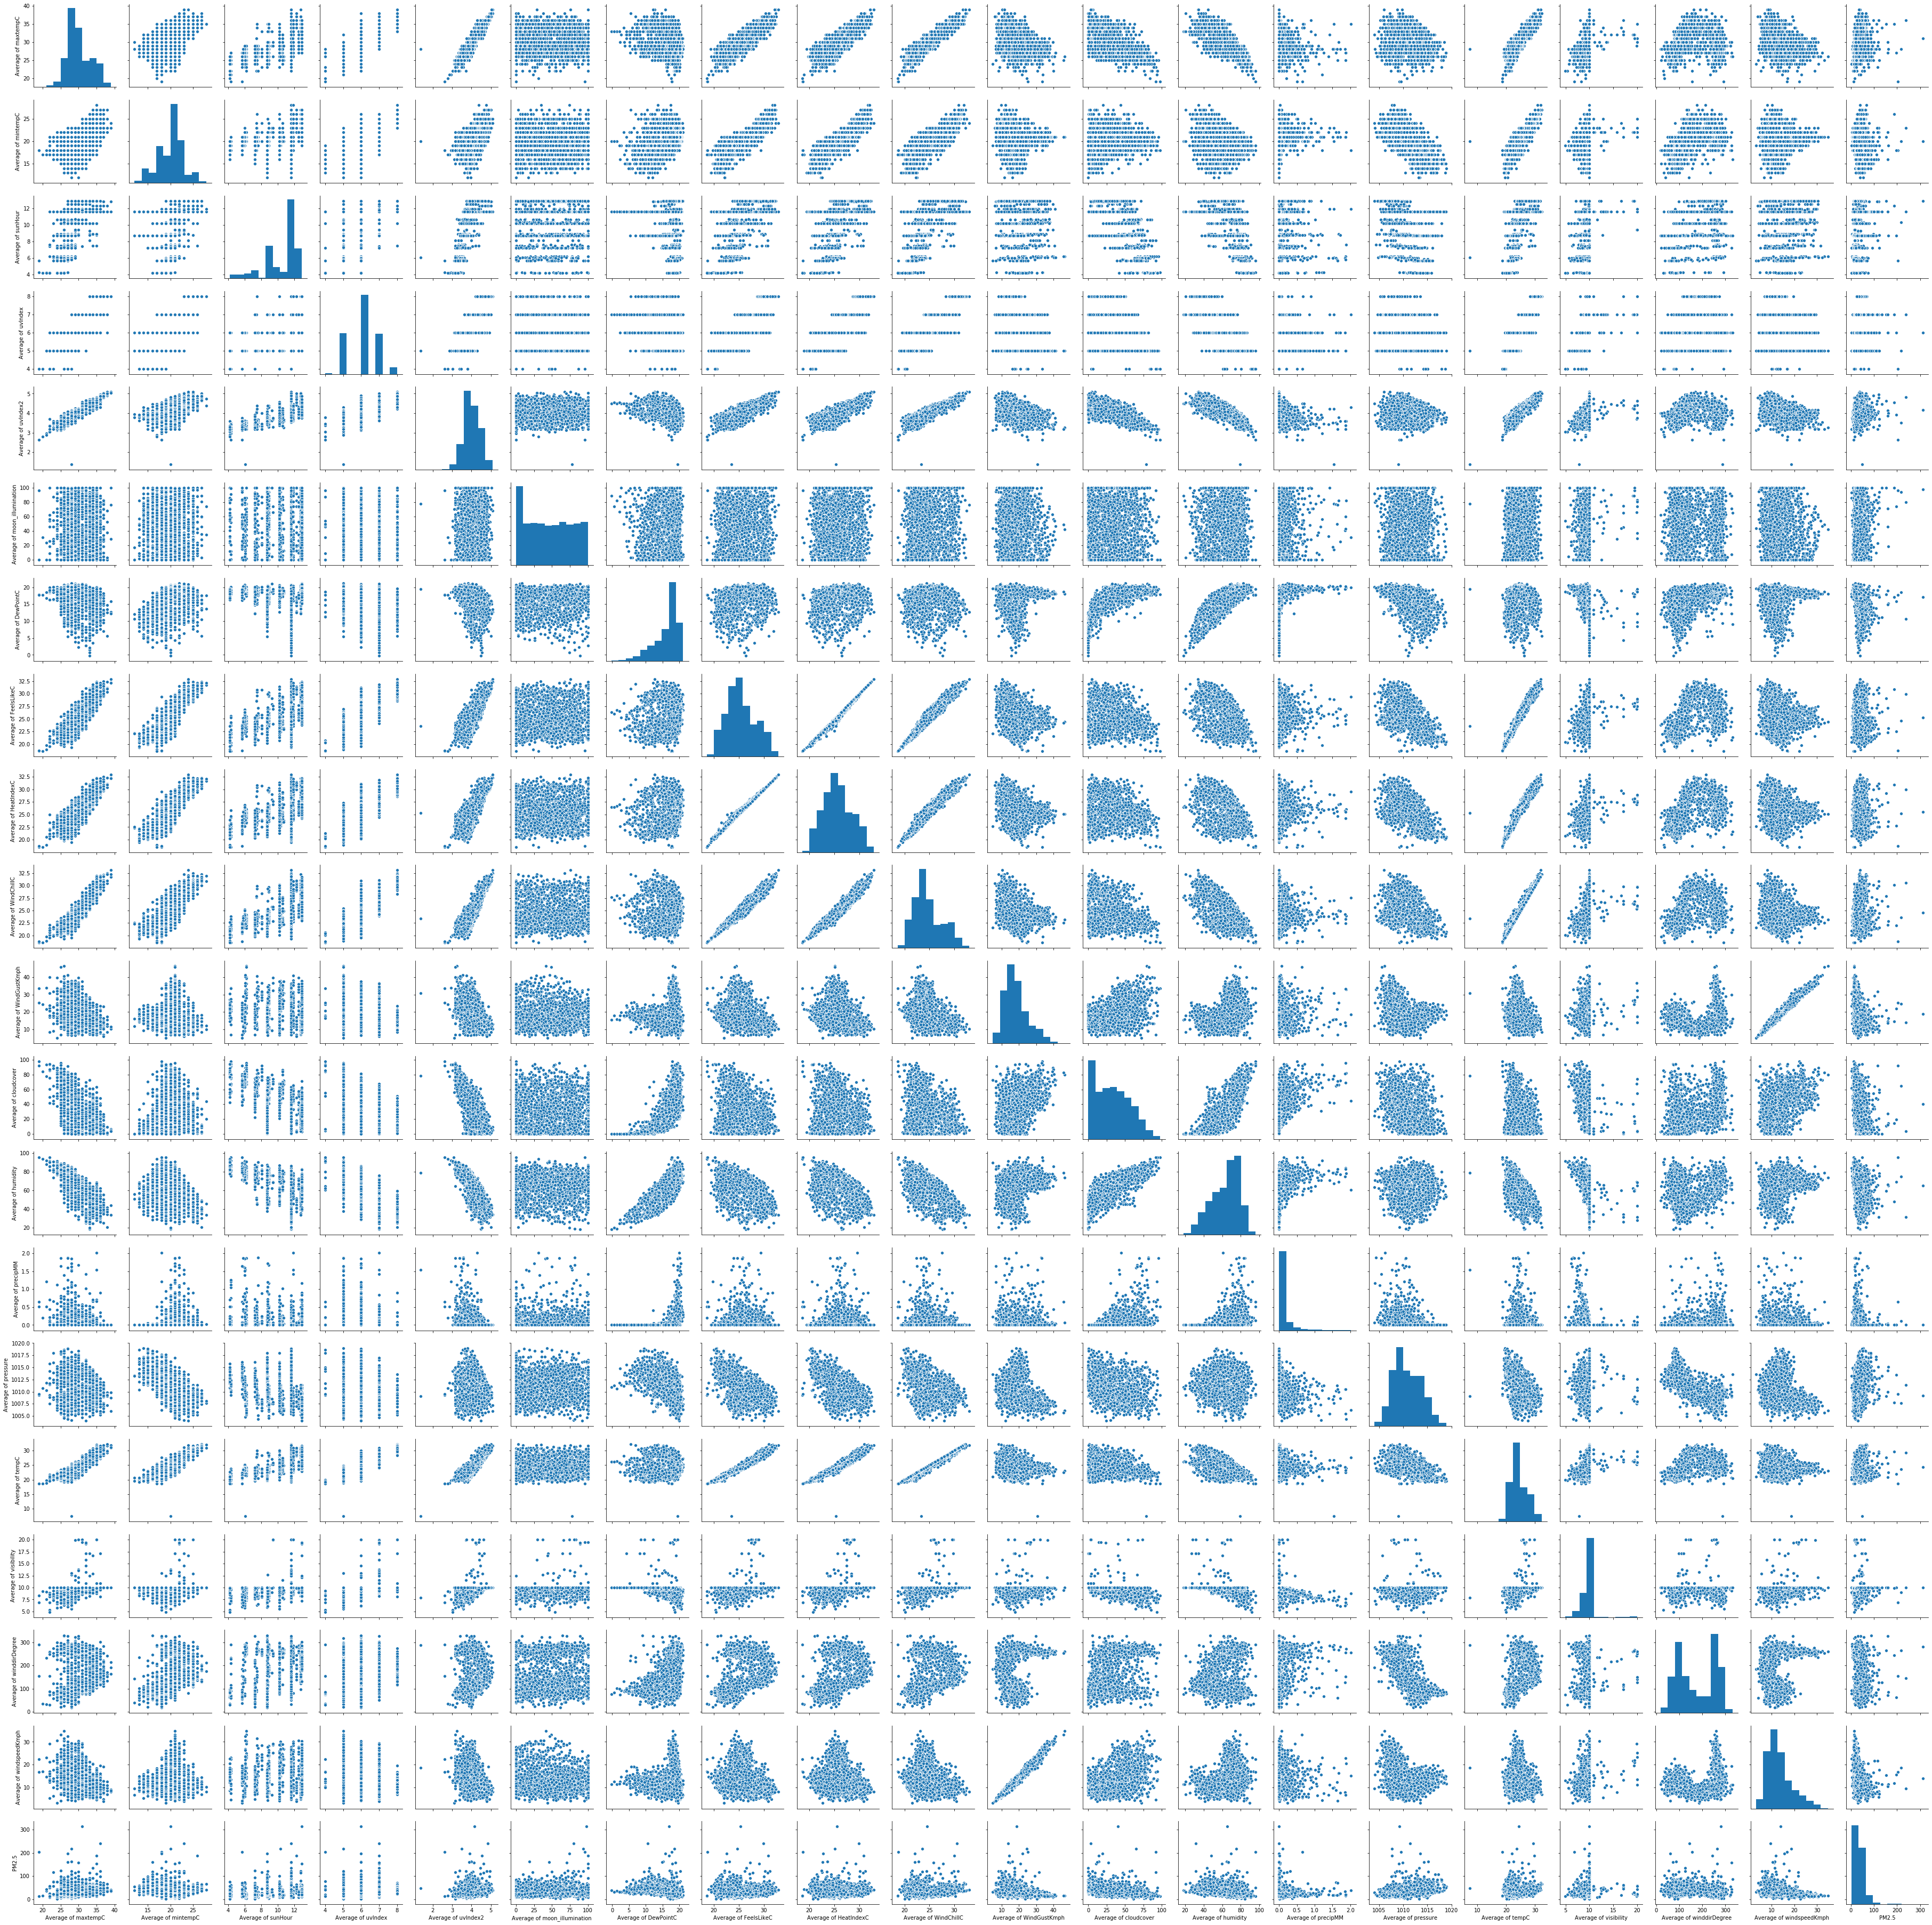

In [38]:
sns.pairplot(data)

In [39]:
data.corr()

Average of maxtempC  Average of mintempC  \
Average of maxtempC                      1.000000             0.541430   
Average of mintempC                      0.541430             1.000000   
Average of sunHour                       0.598870             0.260266   
Average of uvIndex                       0.750531             0.472385   
Average of uvIndex2                      0.917436             0.451753   
Average of moon_illumination             0.011884             0.029828   
Average of DewPointC                    -0.290543             0.383079   
Average of FeelsLikeC                    0.846234             0.861366   
Average of HeatIndexC                    0.831510             0.866885   
Average of WindChillC                    0.918919             0.781631   
Average of WindGustKmph                 -0.349550            -0.042566   
Average of cloudcover                   -0.532918             0.195883   
Average of humidity                     -0.762186            -0.165800   
Average of precipMM                     -0.147803             0.191518   
Average of pressure                     -0.235202            -0.654716   
Average of tempC                         0.877098             0.837865   
Average of visibility                    0.288838             0.117862   
Average of winddirDegree                 0.069883             0.467937   
Average of windspeedKmph                -0.294408             0.053346   
PM2.5                                    0.139502            -0.167180   

                              Average of sunHour  Average of uvIndex  \
Average of maxtempC                     0.598870            0.750531   
Average of mintempC                     0.260266            0.472385   
Average of sunHour                      1.000000            0.472283   
Average of uvIndex                      0.472283            1.000000   
Average of uvIndex2                     0.680739            0.738281   
Average of moon_illumination           -0.015718            0.020800   
Average of DewPointC                   -0.204723           -0.287480   
Average of FeelsLikeC                   0.491292            0.670027   
Average of HeatIndexC                   0.477647            0.652808   
Average of WindChillC                   0.514773            0.737391   
Average of WindGustKmph                -0.113167           -0.282943   
Average of cloudcover                  -0.523431           -0.519603   
Average of humidity                    -0.500512           -0.666762   
Average of precipMM                    -0.241818           -0.176374   
Average of pressure                    -0.229849           -0.146586   
Average of tempC                        0.498456            0.720586   
Average of visibility                   0.290568            0.380922   
Average of winddirDegree                0.240050            0.004684   
Average of windspeedKmph               -0.058909           -0.213772   
PM2.5                                   0.029723            0.145265   

                              Average of uvIndex2  \
Average of maxtempC                      0.917436   
Average of mintempC                      0.451753   
Average of sunHour                       0.680739   
Average of uvIndex                       0.738281   
Average of uvIndex2                      1.000000   
Average of moon_illumination             0.000266   
Average of DewPointC                    -0.358191   
Average of FeelsLikeC                    0.763621   
Average of HeatIndexC                    0.746295   
Average of WindChillC                    0.852753   
Average of WindGustKmph                 -0.397488   
Average of cloudcover                   -0.669282   
Average of humidity                     -0.790647   
Average of precipMM                     -0.306577   
Average of pressure                     -0.138263   
Average of tempC                         0.823654   
Average of visibility                    0.333605   
Average 

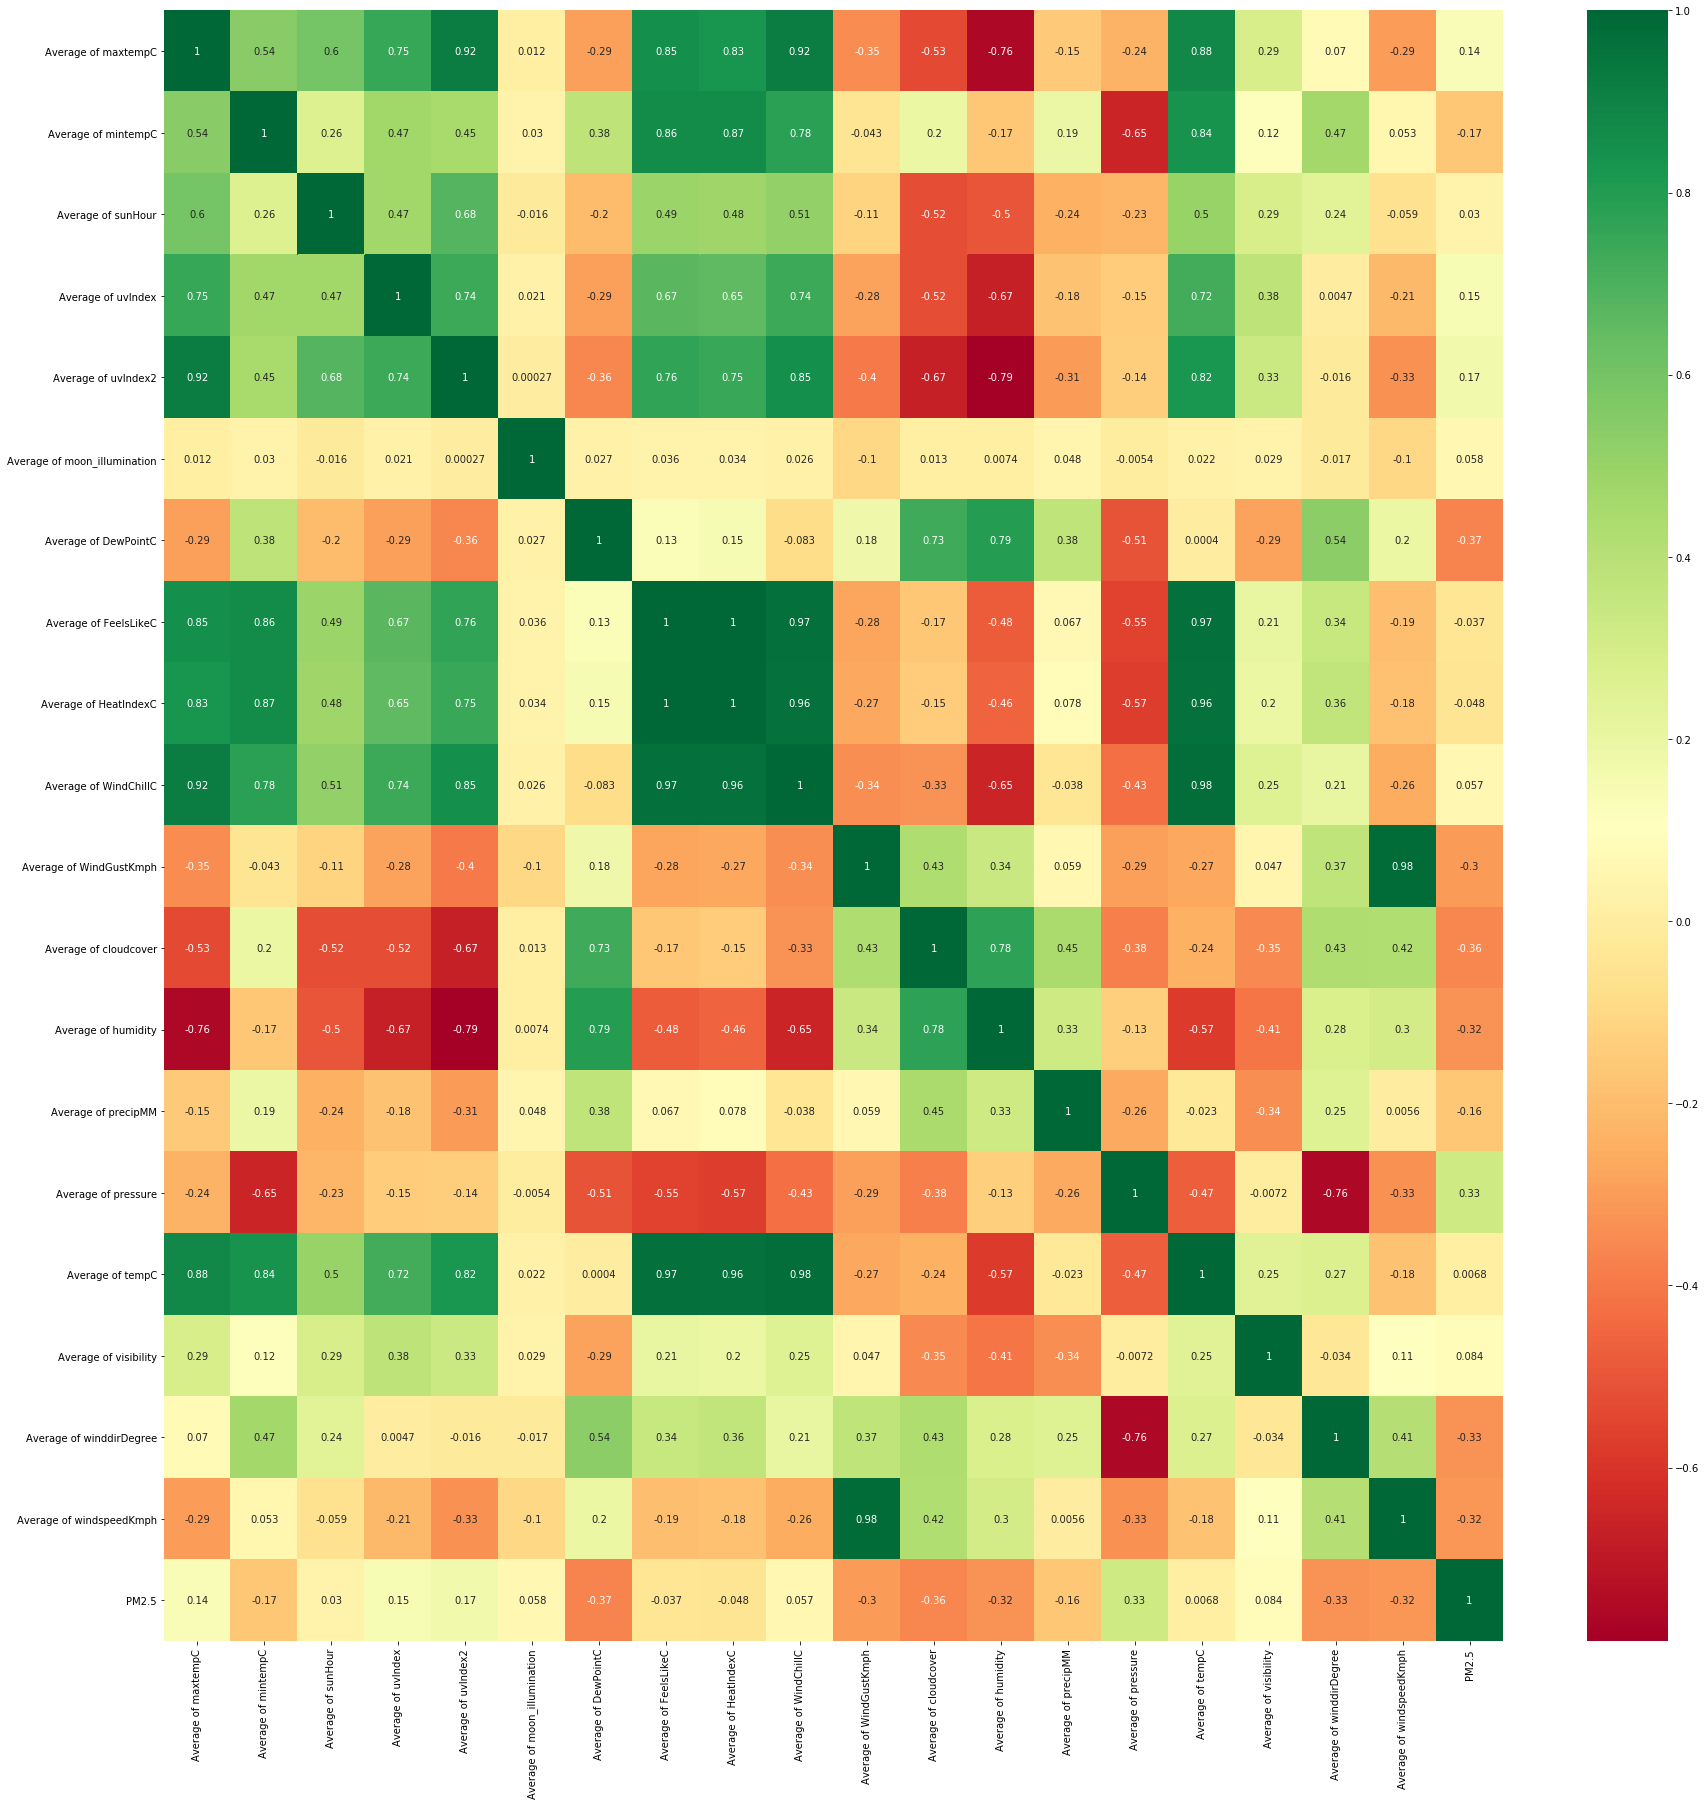

In [40]:
#correlation heatmap
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(30,30))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## Feature Importance

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [42]:
model.feature_importances_

array([0.03958984, 0.02863896, 0.04730866, 0.08345417, 0.14133225,
       0.0369618 , 0.04316783, 0.03746884, 0.05998146, 0.07583137,
       0.06683647, 0.02796723, 0.0710395 , 0.04315197, 0.03114574,
       0.09717109, 0.06895283])

In [43]:
X.head()

Average of sunHour  Average of uvIndex  Average of uvIndex2  \
78                11.6                   7             4.458333   
79                11.6                   7             4.458333   
80                11.6                   7             4.625000   
81                11.6                   7             4.625000   
82                11.6                   7             4.666667   

    Average of moon_illumination  Average of DewPointC  Average of FeelsLikeC  \
78                             0              7.291667              25.541667   
79                             3              5.958333              25.666667   
80                            10              6.750000              27.083333   
81                            17              9.708333              27.541667   
82                            24             11.625000              28.041667   

    Average of HeatIndexC  Average of WindChillC  Average of WindGustKmph  \
78              26.041667              26.416667                22.750000   
79              26.000000              26.541667                22.791667   
80              27.500000              27.875000                19.625000   
81              27.875000              28.208333                16.375000   
82              28.208333              28.375000                18.291667   

    Average of cloudcover  Average of humidity  Average of precipMM  \
78               1.041667            35.833333                  0.0   
79               0.000000            33.458333                  0.0   
80               1.375000            29.875000                  0.0   
81               7.875000            33.583333                  0.0   
82               5.291667            40.166667                  0.0   

    Average of pressure  Average of tempC  Average of visibility  \
78          1013.666667         25.958333                   10.0   
79          1014.583333         26.000000                   10.0   
80          1013.416667         27.000000                   10.0   
81          1011.708333         27.666667                   10.0   
82          1010.458333         27.875000                   10.0   

    Average of winddirDegree  Average of windspeedKmph  
78                107.916667                 15.416667  
79                106.791667                 15.041667  
80                112.541667                 13.125000  
81                106.541667                 10.750000  
82                119.333333                 12.750000

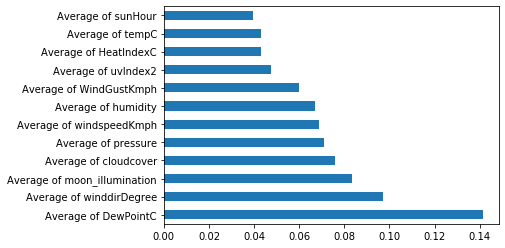

In [44]:
#plotting
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(12).plot(kind='barh')
plt.show()

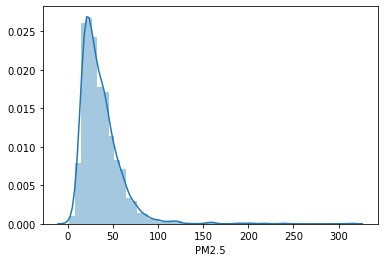

In [45]:
sns.distplot(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## ANN

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [68]:
NN_model = Sequential()

#input layer
NN_model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu', input_dim = X_train.shape[1]))

#hidden layers
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.25))
NN_model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.25))

#output layer
NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))

#compliing the network
NN_model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_squared_error'])
print(NN_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)              

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 823 samples, validate on 353 samples
Epoch 1/100
823/823 [==============================] - 1s 2ms/step - loss: 17.1547 - mean_squared_error: 762.5352 - val_loss: 12.5635 - val_mean_squared_error: 388.1544
Epoch 2/100
823/823 [==============================] - 1s 836us/step - loss: 12.6568 - mean_squared_error: 544.4263 - val_loss: 11.1247 - val_mean_squared_error: 297.5573
Epoch 3/100
823/823 [==============================] - 1s 839us/step - loss: 12.3137 - mean_squared_error: 526.1922 - val_loss: 11.0223 - val_mean_squared_error: 310.0378
Epoch 4/100
823/823 [==============================] - 1s 851us/step - loss: 12.0579 - mean_squared_error: 521.0745 - val_loss: 11.2416 - val_mean_squared_error: 330.3368
Epoch 5/100
823/823 [==============================] - 1s 996us/step - loss: 11.7728 - mean_squared_error: 522.9509 - val_loss: 10.8187 - val_mean_squared_error: 283.2381
Epoch 6/100
823/823 [==============================] - 1s 1ms/step - loss: 11.7835 - mean_squared_err

Epoch 49/100
823/823 [==============================] - 1s 963us/step - loss: 8.4882 - mean_squared_error: 381.6387 - val_loss: 10.3658 - val_mean_squared_error: 275.0705
Epoch 50/100
823/823 [==============================] - 1s 1ms/step - loss: 9.0394 - mean_squared_error: 397.0664 - val_loss: 10.5222 - val_mean_squared_error: 269.8788
Epoch 51/100
823/823 [==============================] - 1s 936us/step - loss: 8.3905 - mean_squared_error: 369.1667 - val_loss: 10.5845 - val_mean_squared_error: 297.6230
Epoch 52/100
823/823 [==============================] - 1s 845us/step - loss: 8.5062 - mean_squared_error: 362.9338 - val_loss: 10.1208 - val_mean_squared_error: 278.1428
Epoch 53/100
823/823 [==============================] - 1s 978us/step - loss: 8.6105 - mean_squared_error: 389.6185 - val_loss: 10.2513 - val_mean_squared_error: 274.7510
Epoch 54/100
823/823 [==============================] - 1s 951us/step - loss: 8.5072 - mean_squared_error: 388.6331 - val_loss: 10.4218 - val_mean_

823/823 [==============================] - 1s 1ms/step - loss: 6.8773 - mean_squared_error: 287.2045 - val_loss: 10.6272 - val_mean_squared_error: 276.8877
Epoch 98/100
823/823 [==============================] - 1s 836us/step - loss: 7.0595 - mean_squared_error: 266.5433 - val_loss: 11.0864 - val_mean_squared_error: 307.9878
Epoch 99/100
823/823 [==============================] - 1s 778us/step - loss: 6.8820 - mean_squared_error: 295.2036 - val_loss: 10.4541 - val_mean_squared_error: 276.7933
Epoch 100/100
823/823 [==============================] - 1s 1ms/step - loss: 6.9223 - mean_squared_error: 288.7842 - val_loss: 10.4625 - val_mean_squared_error: 293.8655


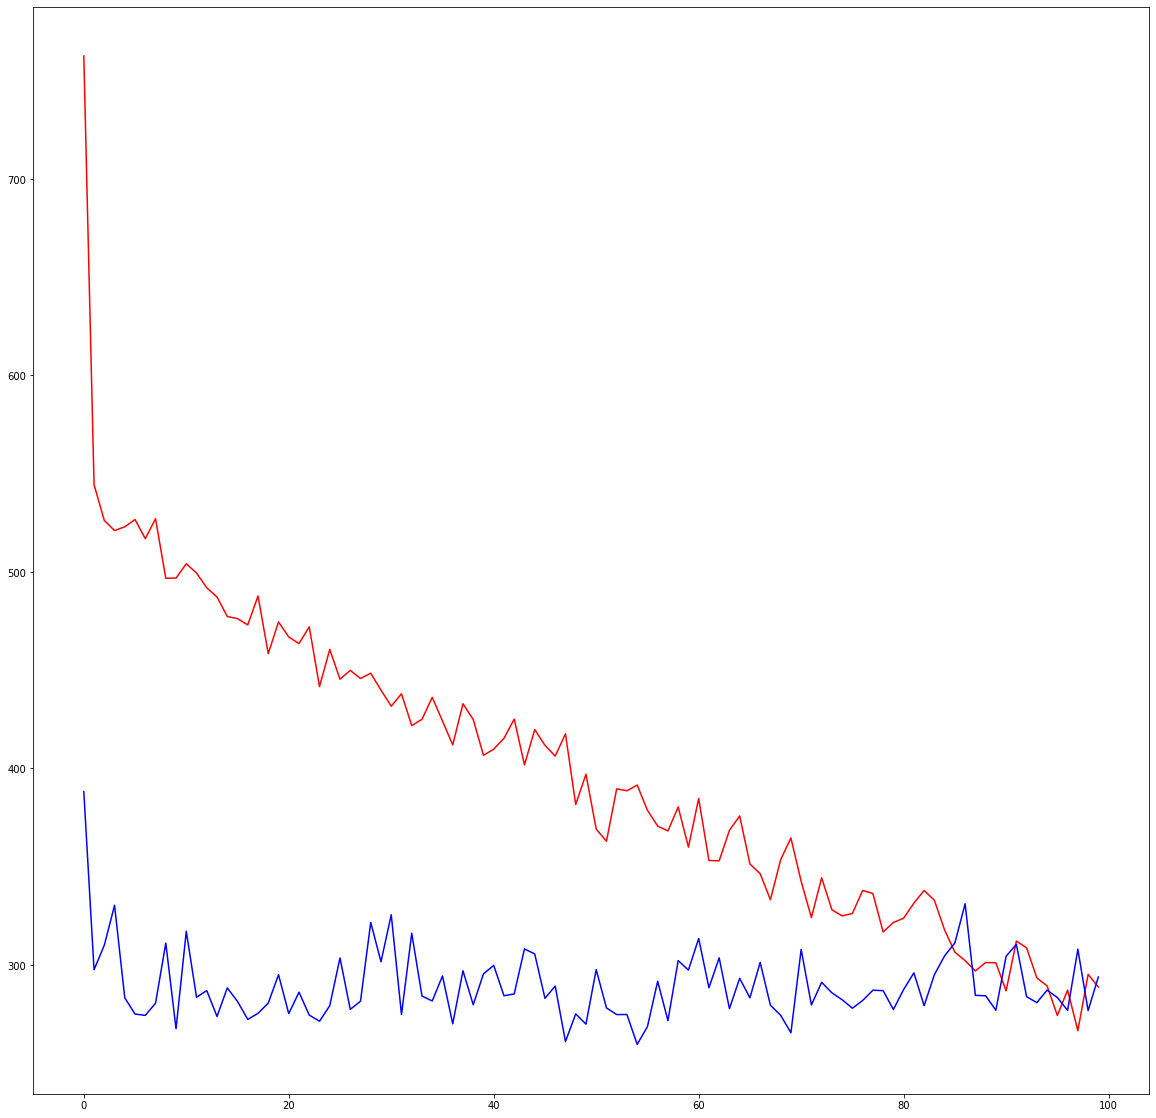

In [69]:
#fitting
NN_model.fit(X_train, y_train, validation_split = 0.3, batch_size =10, nb_epoch = 100)
plt.figure(figsize=(20,20))
plt.plot(NN_model.history.history['mean_squared_error'], 'r', NN_model.history.history['val_mean_squared_error'], 'b')
plt.show()

In [70]:
predict = NN_model.predict(X_test)

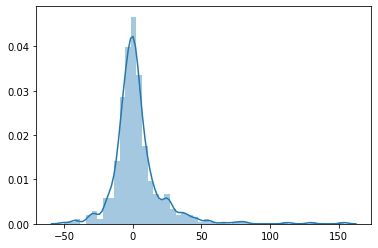

In [77]:
sns.distplot(y_test.values.reshape(-1,1)-predict)

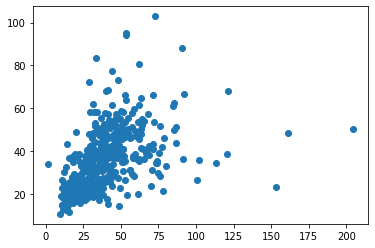

In [73]:
plt.scatter(y_test, predict)

In [74]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predict)


351.1270119349372